In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('data/startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [30]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

DATA CLEANING

In [ ]:
# Clean data using original names
df.dropna(subset=['Amount in USD'], inplace=True)

df['Industry Vertical'] = df['Industry Vertical'].fillna('Unknown')
df['SubVertical'] = df['SubVertical'].fillna('Other')
df['City  Location'] = df['City  Location'].fillna('Unknown')
df['Investors Name'] = df['Investors Name'].fillna('Undisclosed')
df['InvestmentnType'] = df['InvestmentnType'].fillna(df['InvestmentnType'].mode()[0])

# df.drop(columns=['Remarks'], inplace=True)

df['Amount in USD'] = df['Amount in USD'].astype(str).str.replace(',', '')
# df['Amount in USD'] = df['Amount in USD'].astype(float)

# Now rename the columns
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()


Min: 16000.0
Max: 3900000000.0
Mean: 18429897.27080872


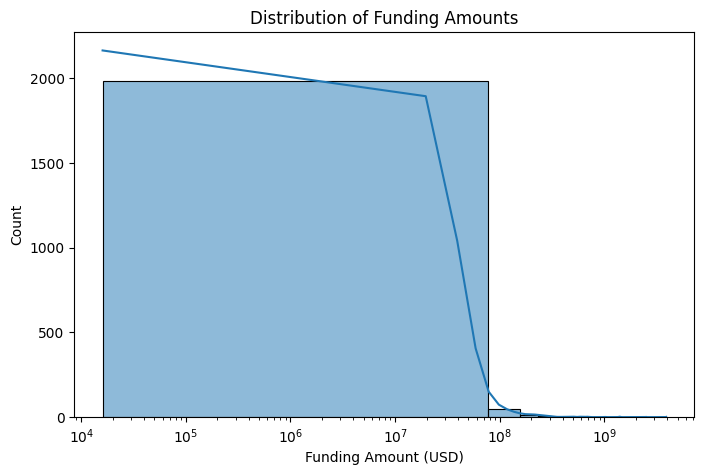

In [ ]:
# cleaning of amount_in_usd
df['amount_in_usd'] = df['amount_in_usd'].replace(['Unknown', 'Undisclosed', 'undisclosed', 'unknown', 'NaN', 'nan'], pd.NA)
df['amount_in_usd'] = df['amount_in_usd'].astype(str).str.replace(',', '')
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')
df.dropna(subset=['amount_in_usd'], inplace=True)

# Basic Stats on Funding Amount
print("Min:", df['amount_in_usd'].min())
print("Max:", df['amount_in_usd'].max())
print("Mean:", df['amount_in_usd'].mean())


plt.figure(figsize=(8,5))
sns.histplot(df['amount_in_usd'], bins=50, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount (USD)')
plt.xscale('log')  # Helps visualize skewed data
plt.show()


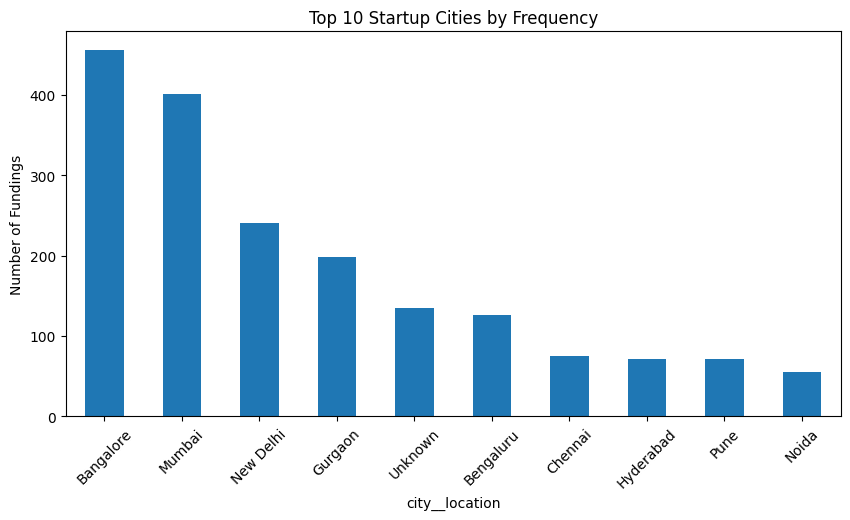

In [ ]:
# top 10 funded cities
plt.figure(figsize=(10,5))
df['city__location'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Startup Cities by Frequency')
plt.ylabel('Number of Fundings')
plt.xticks(rotation=45)
plt.show()

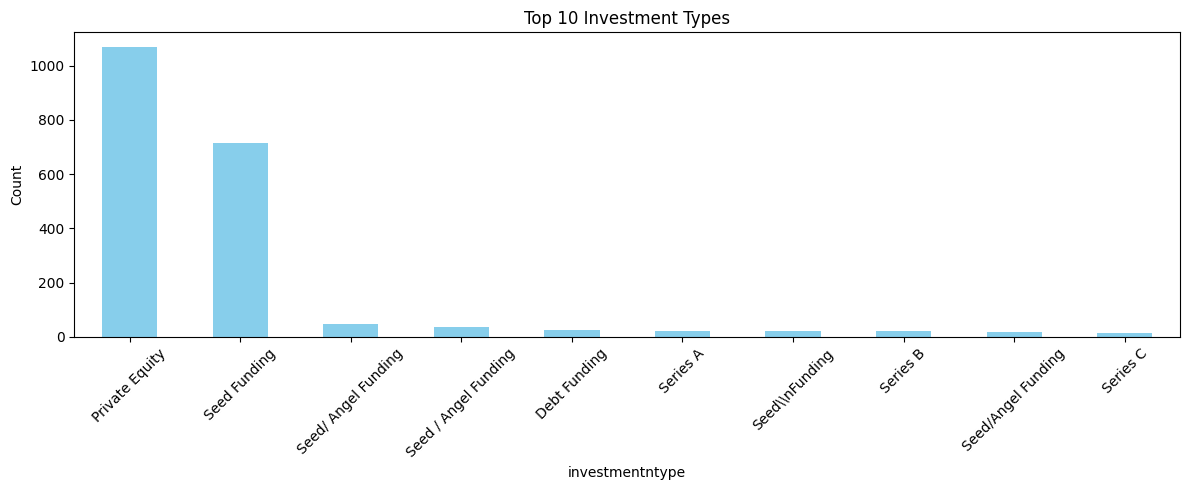

In [ ]:
# Top 10 investment types 
plt.figure(figsize=(12,5))
df['investmentntype'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Investment Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

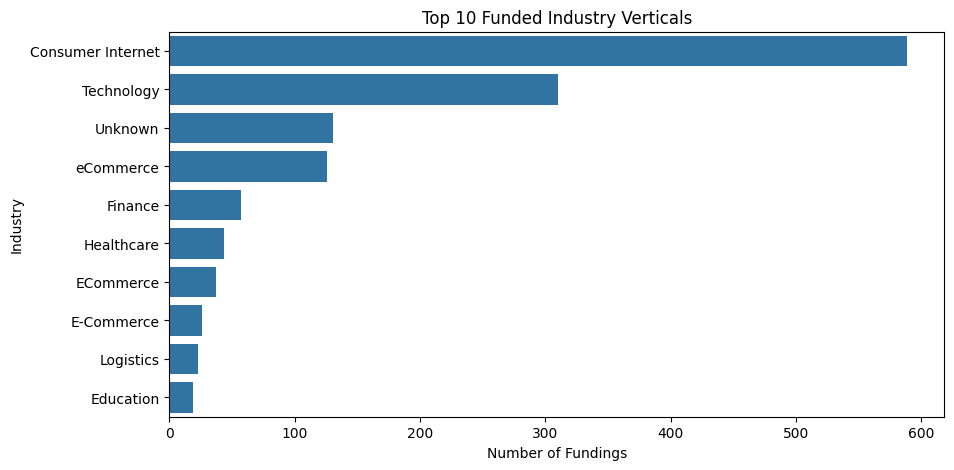

In [56]:
# industry sectors with most fundings
top_industries = df['industry_vertical'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_industries.index, x=top_industries.values)
plt.title('Top 10 Funded Industry Verticals')
plt.xlabel('Number of Fundings')
plt.ylabel('Industry')
plt.show()

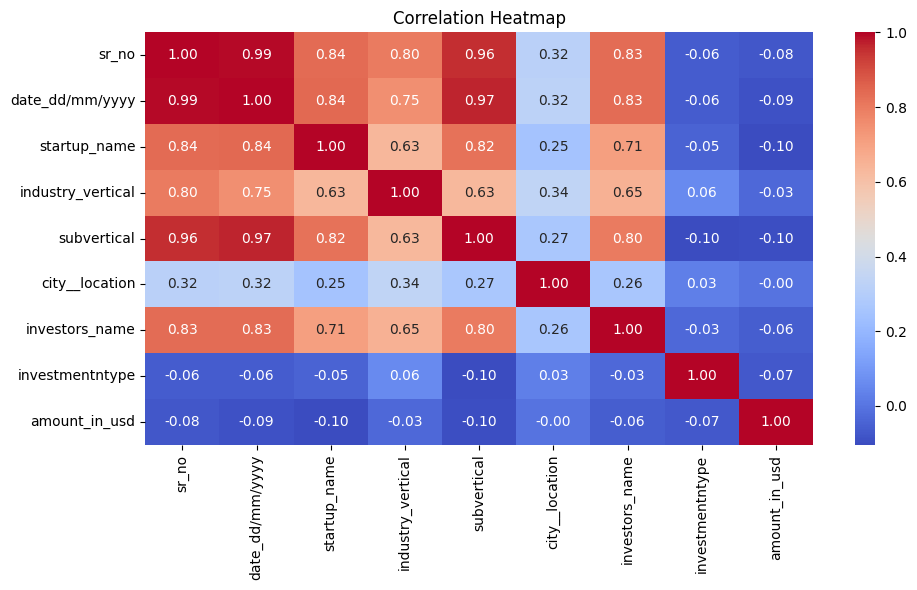

In [60]:
# Correlation Heatmap
df_encoded = df.copy()
# converts column str data to int...like yes,no to 1,0 
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()